In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [ ]:
!pip install hanja
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install  transformers
!pip install torch
!pip install hanja
!pip install imblearn
!pip install WordCloud
!apt-get install fonts-nanum*
!apt-get install fontconfig

# 전처리를 위한 EDA 

In [ ]:
import pandas as pd
import re
from collections import defaultdict, Counter
import seaborn as sns
import hanja
import konlpy
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
train      = pd.read_csv("data/klue/open/train_data.csv")
test       = pd.read_csv("data/klue/open/test_data.csv")

In [ ]:
titles = train['title']
topic_idx = train['topic_idx']

## train set 문자열 길이정보

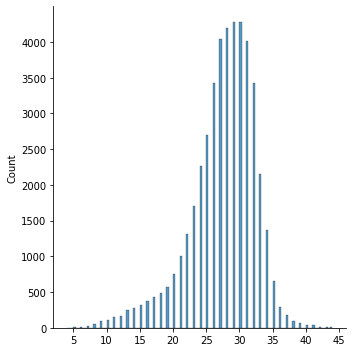

In [ ]:
train_lengths = [len(t) for t in titles]
sns.displot(train_lengths)

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
token_sentences = [mecab.morphs(text) for text in titles]

In [ ]:
counter = Counter()
for title in token_sentences:
  counter.update(title)

In [ ]:
from wordcloud import WordCloud

## train 셋 전체의 단어 분포

(-0.5, 399.5, 199.5, -0.5)

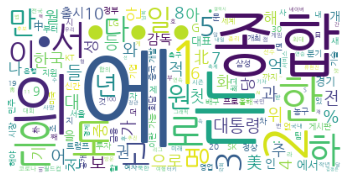

In [ ]:
# 전체
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter)
plt.imshow(cloud)
plt.axis('off')

## Word counter

In [ ]:
df_list = []
for i in range(7):
  df_list.append(train.loc[train.topic_idx==i])

In [ ]:
title_list = []
for i in range(7):
  title_list.append(df_list[i].title.to_numpy())

In [ ]:
filter_pos = ['NNP', 'NNG','SL']# 명사, 외래어 출력

In [ ]:
token_sentence_list = []
for i in range(7):
  titles = title_list[i]
  token_sentences = [word for text in titles for word, pos in mecab.pos(text) if pos in filter_pos]
  token_sentence_list.append(token_sentences)

In [ ]:
counter_list = []
for i in range(7):
  counter = Counter(token_sentence_list[i])    
  counter_list.append(counter)

(-0.5, 399.5, 199.5, -0.5)

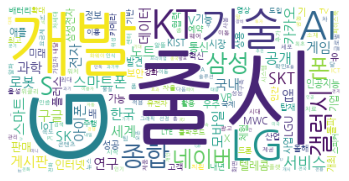

In [ ]:
# IT과학
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[0])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

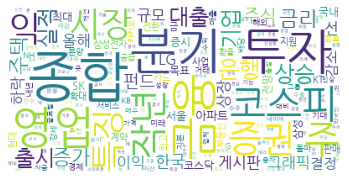

In [ ]:
# 경제
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[1])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

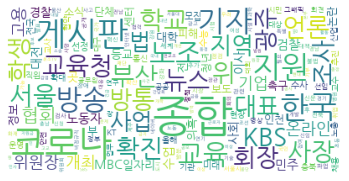

In [ ]:
# 사회
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[2])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

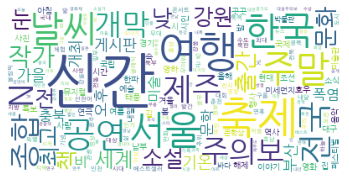

In [ ]:
# 생활문화
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[3])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

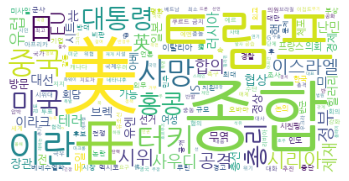

In [ ]:
# 세계 (한문 데이터가 많음)
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[4])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

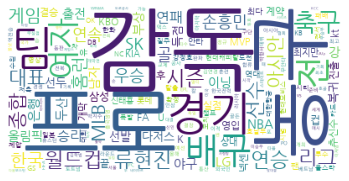

In [ ]:
# 스포츠
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[5])
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

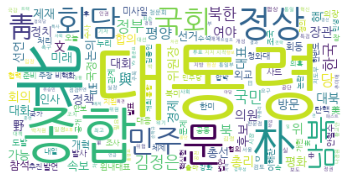

In [ ]:
# 정치
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter_list[6])
plt.imshow(cloud)
plt.axis('off')

In [ ]:
topic_dict = pd.read_csv("data/klue/open/topic_dict.csv")
print(topic_dict)

  topic  topic_idx
0  IT과학          0
1    경제          1
2    사회          2
3  생활문화          3
4    세계          4
5   스포츠          5
6    정치          6


## MODEL1. Albert_kor_base

In [ ]:
from transformers import BertTokenizerFast, AlbertModel, BertModel, AutoTokenizer
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import hanja
from imblearn.over_sampling import RandomOverSampler
from transformers.optimization import get_cosine_schedule_with_warmup, get_linear_schedule_with_warmup
from transformers import AdamW
from collections import defaultdict

In [ ]:
tokenizer_bert_kor_base = BertTokenizerFast.from_pretrained("kykim/albert-kor-base")
train      = pd.read_csv("data/klue/open/train_data.csv")
df_valid       = pd.read_csv("data/klue/open/test_data.csv")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizer'. 
The class this function is called from is 'BertTokenizer'.
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'AlbertTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.


## Train 데이터 불균형 (SMOTE 사용)

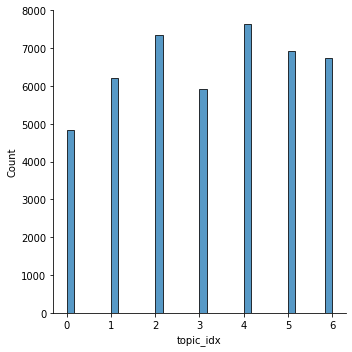

In [ ]:
sns.displot(train.topic_idx)

In [ ]:
titles_t = train.title.to_numpy().reshape(-1,1)
labels_t = train.topic_idx.to_numpy().reshape(-1,1)
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(titles_t, labels_t)
train = pd.DataFrame({'title':X_over.reshape(-1), 'topic_idx':y_over.reshape(-1)})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


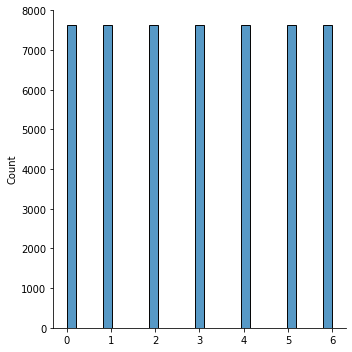

In [ ]:
# 데이터 불균형 해결
sns.displot(y_over)

In [ ]:

# 뉴스 데이터 클래스 생성
class NewsSubjectDataset(Dataset):
  def __init__(self, subjects, targets, tokenizer, max_len):
    self.subjects = subjects
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.subjects)
  def __getitem__(self, item):
    subject = str(self.subjects[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      subject,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding = 'max_length',
      truncation = True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
      'subject_text': subject,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }
def create_data_loader(df, tokenizer, max_len, batch_size, shuffle_=False, valid=False):
  if valid:
    ds = NewsSubjectDataset(
      subjects=df.title.to_numpy(),
      targets=np.zeros(len(df)),
      tokenizer=tokenizer,
      max_len=max_len
      )
  else:
    ds = NewsSubjectDataset(
      subjects=df.title.to_numpy(),
      targets=df.topic_idx.to_numpy(),
      tokenizer=tokenizer,
      max_len=max_len
    )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4,
    shuffle = shuffle_
  )
  
# 데이터 로더 생성
BATCH_SIZE =64
MAX_LEN =32
train_data_loader = create_data_loader(train, tokenizer_bert_kor_base, MAX_LEN, BATCH_SIZE, shuffle_=True)
valid_data_loader = create_data_loader(df_valid, tokenizer_bert_kor_base, MAX_LEN, BATCH_SIZE, valid=True)
import random
class NewsSubjectClassifier(nn.Module):
  def __init__(self, n_classes):
    super(NewsSubjectClassifier, self).__init__()
    self.bert = AlbertModel.from_pretrained("kykim/albert-kor-base")
    self.drop = nn.Dropout(p=0.5)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
       return_dict=False
    )
    output = self.drop(pooled_output)
    return self.out(output)

device = torch.device("cuda")
def get_predictions(model, data_loader):
  model = model.eval()
  subject_texts = []
  predictions = []
  prediction_probs = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["subject_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      subject_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  return subject_texts, predictions, prediction_probs
import gc
EPOCHS = 2

In [ ]:

model_albert_kor_base = NewsSubjectClassifier(n_classes=7).to(device)
optimizer = AdamW(model_albert_kor_base.parameters(), lr=1e-4)
total_steps = len(train_data_loader) * EPOCHS
## cosine_scheduler or linear,  warmup or no warmup
scheduler = get_cosine_schedule_with_warmup(
  optimizer,
  num_warmup_steps=int(total_steps*0.1),
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

from tqdm import tqdm
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model_albert_kor_base,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(train)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')

y_review_texts, y_pred, y_pred_probs = get_predictions(
  model_albert_kor_base,
  valid_data_loader
)
answers = []
answers.append(y_pred.tolist())
gc.collect()
torch.cuda.empty_cache()

# Model 2. bert_kor_base

In [ ]:
tokenizer_bert_kor_base = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")
# 데이터 로더 생성
BATCH_SIZE =64
MAX_LEN =32
train_data_loader = create_data_loader(train, tokenizer_bert_kor_base, MAX_LEN, BATCH_SIZE, shuffle_=True)
valid_data_loader = create_data_loader(df_valid, tokenizer_bert_kor_base, MAX_LEN, BATCH_SIZE, valid=True)
class NewsSubjectClassifier(nn.Module):
  def __init__(self, n_classes):
    super(NewsSubjectClassifier, self).__init__()
    self.bert = BertModel.from_pretrained("kykim/bert-kor-base")
    self.drop = nn.Dropout(p=0.5)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
       return_dict=False
    )
    output = self.drop(pooled_output)
    return self.out(output)

device = torch.device("cuda")

def get_predictions(model, data_loader):
  model = model.eval()
  subject_texts = []
  predictions = []
  prediction_probs = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["subject_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      subject_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  return subject_texts, predictions, prediction_probs

import gc


EPOCHS = 2
model_bert_kor_base = NewsSubjectClassifier(n_classes=7).to(device)
optimizer = AdamW(model_bert_kor_base.parameters(), lr=1e-4)
total_steps = len(train_data_loader) * EPOCHS
## cosine_scheduler or linear,  warmup or no warmup
scheduler = get_cosine_schedule_with_warmup(
  optimizer,
  num_warmup_steps=int(total_steps*0.1),
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

from tqdm import tqdm
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model_bert_kor_base,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(train)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')


def get_predictions(model, data_loader):
  model = model.eval()
  subject_texts = []
  predictions = []
  prediction_probs = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["subject_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      subject_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  return subject_texts, predictions, prediction_probs

y_review_texts, y_pred, y_pred_probs = get_predictions(
  model_bert_kor_base,
  valid_data_loader
)
# answers에 저장
answers.append(y_pred.tolist())


# Model 3. electra-kor-base

In [ ]:
from transformers import ElectraTokenizerFast, ElectraModel, AdamW, ElectraForSequenceClassification
""" KLUE 학습용 데이터 가져오기 """

train = pd.read_csv('data/klue/open/train_data.csv')
test = pd.read_csv('data/klue/open/test_data.csv')
""" 데이터 전처리 및 오버 샘플링 """
def preprocessing(title):
  x = title[:]
  x = re.sub('→', '에서 ', x)
  x = re.sub('美', '미국 ', x)
  x = re.sub('韓', '한국 ', x)
  x = re.sub('日', '일본 ', x)
  x = re.sub('中', '중국 ', x)
  x = re.sub('英', '영국 ', x)
  x = re.sub('獨', '독일 ', x)
  x = re.sub('北', '북한', x)
  x = re.sub('與', '여당 ', x)
  x = re.sub('野', '야당 ', x)
  x = re.sub('伊', '', x)
  x = re.sub('朴', '', x)
  x = re.sub('文', '', x)
  x = re.sub('反', '반대 ', x)
  x = re.sub('前', '이전 ', x)
  x = re.sub('女', '여자 ', x)
  x = re.sub('月', '월', x)
  x = re.sub('檢', '검찰 ', x)
  x = re.sub('小', '소', x)
  x = re.sub('南', '남한', x)
  x = re.sub('軍', '군', x)
  x = re.sub('中企', '중소기업', x)
  x = re.sub('惡', '', x)
  x = re.sub('↓', '하락 ', x)
  x = re.sub('↑', '상승 ', x)
  x = re.sub('行', '행', x)
  x = re.sub('㈜', '주식회사 ', x)
  x = re.sub('安', '', x)
  x = re.sub('靑', '청와대 ', x)
  x = re.sub('佛', '불교 ', x)
  x = re.sub('株', '주식 ', x)
  x = re.sub('重', '중공업 ', x)
  x = re.sub('對', 'vs', x)
  x = re.sub('展', '전시회', x)
  x = re.sub('親', '친', x)
  x = re.sub('盧', '', x)
  x = re.sub('黃', '', x)
  x = re.sub('硏', '연구소', x)
  x = re.sub('故', '고인', x)
  x = re.sub('銀', '은', x)
  x = re.sub('新', '새로운', x)
  x = re.sub('詩', '시', x)
  x = re.sub('家', '집안', x)
  x = re.sub('黨', '당', x)
  x = re.sub('종합', '', x)
  x = re.sub('印', '인도', x)
  x = re.sub('\.\.\.', '', x)
  x = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣一-龥a-zA-Z0-9.%\s]', ' ', x)
  x = hanja.translate(x, 'substitution')
  return x.strip()
oversample = RandomOverSampler()
titles_t = train.title.to_numpy().reshape(-1, 1)
labels_t = train.topic_idx.to_numpy().reshape(-1, 1)
X_over, y_over = oversample.fit_resample(titles_t, labels_t)
train = pd.DataFrame({'title' : X_over.reshape(-1),
                      'topic_idx' : y_over.reshape(-1)})
train['title'] = train['title'].apply(preprocessing)
test['title'] = test['title'].apply(preprocessing)
PRE_TRAINED_MODEL_NAME = "kykim/electra-kor-base"
tokenizer = ElectraTokenizerFast.from_pretrained(PRE_TRAINED_MODEL_NAME)
device = torch.device("cuda")
class KLUEDataset_train(Dataset):
  def __init__(self, DataFrame):
    self.dataset = DataFrame
    self.tokenizer = tokenizer

    # print(self.dataset.describe())

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    row = self.dataset.loc[idx, ['title', 'topic_idx']].values
    text = row[0]
    y = row[1]

    inputs = self.tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=32,
        pad_to_max_length=True,
        add_special_tokens=True
    )

    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]

    return input_ids, attention_mask, y
class KLUEDataset_test(Dataset):
  def __init__(self, DataFrame):
    self.dataset = DataFrame
    self.tokenizer = tokenizer

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    row = self.dataset.loc[idx, ['title']].values
    text = row[0]

    inputs = self.tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=32,
        pad_to_max_length=True,
        add_special_tokens=True
    )

    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]

    return input_ids, attention_mask
train_dataset = KLUEDataset_train(train)
test_dataset = KLUEDataset_test(test)
import gc
gc.collect()
torch.cuda.empty_cache()
EPOCHS = 2
batch_size = 128
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
total_steps = len(train_data_loader) * EPOCHS
# 모델 학습 파라미터
warmup_ratio = 0.1
NUM_OF_MODELS = 5
import random
losses = []
accuracy = []

model = ElectraForSequenceClassification.from_pretrained("kykim/electra-kor-base", num_labels=7).to(device)
optimizer = AdamW(model.parameters(), lr=1e-4)
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=1, num_training_steps=total_steps)
for i in range(EPOCHS):
  total_loss = 0.0
  correct = 0
  total = 0
  batches = 0

  model.train()

  for input_ids_batch, attention_masks_batch, y_batch in tqdm(train_data_loader):
    optimizer.zero_grad()
    y_batch = y_batch.to(device)
    y_pred = model(input_ids_batch.to(device), attention_mask = attention_masks_batch.to(device))[0]
    loss = F.cross_entropy(y_pred, y_batch)
    loss.backward()
    optimizer.step()
    scheduler.step()

    total_loss += loss.item()

    _, predicted = torch.max(y_pred, 1)
    correct += (predicted == y_batch).sum()
    total += len(y_batch)

    batches += 1
    if batches % 100 == 0:
      print("Batch Loss: ", total_loss, "Accuracy: ", correct.float() / total)
      
  losses.append(total_loss)
  accuracy.append(correct.float() / total)
  print("Train Loss :", total_loss, "Accuracy :", correct.float() / total)

answer = []
torch.save(model, './Electra_kor_base.model')
model.eval()

for input_ids_batch, attention_masks_batch in tqdm(test_data_loader):
  y_pred = model(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0]
  _, predicted = torch.max(y_pred, 1)
  answer.append(predicted.item())
    
answers.append(answer)
gc.collect()
torch.cuda.empty_cache()

# Model 4. kcbert-large

In [ ]:
# 뉴스 데이터 클래스 생성
class NewsSubjectDataset(Dataset):
  def __init__(self, subjects, targets, tokenizer, max_len):
    self.subjects = subjects
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.subjects)
  def __getitem__(self, item):
    subject = str(self.subjects[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      subject,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding = 'max_length',
      truncation = True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
      'subject_text': subject,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }
def create_data_loader(df, tokenizer, max_len, batch_size, shuffle_=False, valid=False):
  if valid:
    ds = NewsSubjectDataset(
      subjects=df.title.to_numpy(),
      targets=np.zeros(len(df)),
      tokenizer=tokenizer,
      max_len=max_len
      )
  else:
    ds = NewsSubjectDataset(
      subjects=df.title.to_numpy(),
      targets=df.topic_idx.to_numpy(),
      tokenizer=tokenizer,
      max_len=max_len
    )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4,
    shuffle = shuffle_
  )
# 데이터 로더 생성
BATCH_SIZE =64
MAX_LEN =32
train      = pd.read_csv("data/klue/open/train_data.csv")
df_valid       = pd.read_csv("data/klue/open/test_data.csv")
titles_t = train.title.to_numpy().reshape(-1,1)
labels_t = train.topic_idx.to_numpy().reshape(-1,1)
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(titles_t, labels_t)
train = pd.DataFrame({'title':X_over.reshape(-1), 'topic_idx':y_over.reshape(-1)})
tokenizer_kcbert = AutoTokenizer.from_pretrained("beomi/kcbert-large")
train_data_loader = create_data_loader(train, tokenizer_kcbert, MAX_LEN, BATCH_SIZE, shuffle_=True)
valid_data_loader = create_data_loader(df_valid, tokenizer_kcbert, MAX_LEN, BATCH_SIZE, valid=True)
def remove_and_substitute(title):
  x = title[:]
  x = re.sub('→', '에서 ', x)
  x = re.sub('美', ' 미국 ', x)
  x = re.sub('韓', ' 한국 ', x)
  x = re.sub('日', ' 일본 ', x)
  x = re.sub('中', ' 중국 ', x)
  x = re.sub('英', ' 영국 ', x)
  x = re.sub('獨', ' 독일 ', x)
  x = re.sub('北', ' 북한', x)
  x = re.sub('與', ' 여당', x)
  x = re.sub('野', ' 야당', x)
  x = re.sub('伊', ' 이명박 ', x)
  x = re.sub('朴', ' 박근혜 ', x)
  x = re.sub('文', ' 문재인 ', x)
  x = re.sub('反', '반대', x)
  x = re.sub('前', '전', x)
  x = re.sub('女', ' 여자 ', x)
  x = re.sub('月', '월 ', x)
  x = re.sub('檢', ' 검찰 ', x)
  x = re.sub('小', ' 소폭 ', x)
  x = re.sub('大', ' 대폭 ', x)
  x = re.sub('南', ' 남한 ', x)
  x = re.sub('軍', ' 군 ', x)
  x = re.sub('中企', ' 중소기업 ', x)
  x = re.sub('惡', ' 악마 ', x)
  x = re.sub('↓', ' 하락 ', x)
  x = re.sub('↑', ' 상승 ', x)
  x = re.sub('行', '행 ', x)
  x = re.sub('㈜', ' 주식회사 ', x)
  x = re.sub('安', ' 안철수 ', x)
  x = re.sub('靑', ' 청와대 ', x)
  x = re.sub('佛', ' 불교 ', x)
  x = re.sub('株', ' 주식 ', x)
  x = re.sub('重', ' 중공업 ', x)
  x = re.sub('對', ' vs ', x)
  x = re.sub('展', ' 전시회 ', x)
  x = re.sub('親', ' 친', x)
  x = re.sub('盧', ' 노무현 ', x)
  x = re.sub('黃', ' 황교안 ', x)
  x = re.sub('硏', ' 연구소 ', x)
  x = re.sub('故', ' 고 ', x)
  x = re.sub('銀', ' 은행 ', x)
  x = re.sub('新', ' 신 ', x)
  x = re.sub('詩', ' 시 ', x)
  x = re.sub('家', ' 가 ', x)
  x = re.sub('黨', ' 당 ', x)
  x = re.sub('종합', '', x)
  x = re.sub('印', ' 인도 ', x)
  x = re.sub('\.\.\.', '', x)
  x = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z\s]', ' ', x)
  x = hanja.translate(x, 'substitution')
  return x.strip()
  
k = train['title'].apply(remove_and_substitute)
train.title = k
k = df_valid['title'].apply(remove_and_substitute)
df_valid.title = k
class NewsSubjectClassifier_kcbert(nn.Module):
  def __init__(self, n_classes):
    super(NewsSubjectClassifier_kcbert, self).__init__()
    self.bert = BertModel.from_pretrained("beomi/kcbert-large")
    self.drop = nn.Dropout(p=0.5)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
       return_dict=False
    )
    output = self.drop(pooled_output)
    return self.out(output)
device = torch.device("cuda")
EPOCHS = 2
loss_fn = nn.CrossEntropyLoss().to(device)
from tqdm import tqdm
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)
EPOCHS = 2

model_kcbert = NewsSubjectClassifier_kcbert(n_classes=7).to(device)
optimizer = AdamW(model_kcbert.parameters(), lr=1e-5)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=int(total_steps*0.1), num_training_steps=total_steps)
for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model_kcbert,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(train)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')

y_review_texts, y_pred, y_pred_probs = get_predictions(
  model_kcbert,
  valid_data_loader
)

answers.append(y_pred.tolist())

# Model 5. Kobert

In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
from tqdm import tqdm, tqdm_notebook
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

##GPU 사용 시
device = torch.device("cuda")
bertmodel, vocab = get_pytorch_kobert_model()

train      = pd.read_csv("data/klue/open/train_data.csv")
df_valid       = pd.read_csv("data/klue/open/test_data.csv")

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
titles_t = train.title.to_numpy().reshape(-1,1)
labels_t = train.topic_idx.to_numpy().reshape(-1,1)
X_over, y_over = oversample.fit_resample(titles_t, labels_t)
train = pd.DataFrame({'title':X_over.reshape(-1), 'topic_idx':y_over.reshape(-1)})


def remove_and_substitute(title):
  x = title[:]
  x = re.sub('→', '에서 ', x)
  x = re.sub('美', ' 미국 ', x)
  x = re.sub('韓', ' 한국 ', x)
  x = re.sub('日', ' 일본 ', x)
  x = re.sub('中', ' 중국 ', x)
  x = re.sub('英', ' 영국 ', x)
  x = re.sub('獨', ' 독일 ', x)
  x = re.sub('北', ' 북한', x)
  x = re.sub('與', ' 여당', x)
  x = re.sub('野', ' 야당', x)
  x = re.sub('伊', ' 이명박 ', x)
  x = re.sub('朴', ' 박근혜 ', x)
  x = re.sub('文', ' 문재인 ', x)
  x = re.sub('反', '반대', x)
  x = re.sub('前', '전', x)
  x = re.sub('女', ' 여자 ', x)
  x = re.sub('月', '월 ', x)
  x = re.sub('檢', ' 검찰 ', x)
  x = re.sub('小', ' 소폭 ', x)
  x = re.sub('大', ' 대폭 ', x)
  x = re.sub('南', ' 남한 ', x)
  x = re.sub('軍', ' 군 ', x)
  x = re.sub('中企', ' 중소기업 ', x)
  x = re.sub('惡', ' 악마 ', x)
  x = re.sub('↓', ' 하락 ', x)
  x = re.sub('↑', ' 상승 ', x)
  x = re.sub('行', '행 ', x)
  x = re.sub('㈜', ' 주식회사 ', x)
  x = re.sub('安', ' 안철수 ', x)
  x = re.sub('靑', ' 청와대 ', x)
  x = re.sub('佛', ' 불교 ', x)
  x = re.sub('株', ' 주식 ', x)
  x = re.sub('重', ' 중공업 ', x)
  x = re.sub('對', ' vs ', x)
  x = re.sub('展', ' 전시회 ', x)
  x = re.sub('親', ' 친', x)
  x = re.sub('盧', ' 노무현 ', x)
  x = re.sub('黃', ' 황교안 ', x)
  x = re.sub('硏', ' 연구소 ', x)
  x = re.sub('故', ' 고 ', x)
  x = re.sub('銀', ' 은행 ', x)
  x = re.sub('新', ' 신 ', x)
  x = re.sub('詩', ' 시 ', x)
  x = re.sub('家', ' 가 ', x)
  x = re.sub('黨', ' 당 ', x)
  x = re.sub('종합', '', x)
  x = re.sub('印', ' 인도 ', x)
  x = re.sub('\.\.\.', '', x)
  x = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z\s]', ' ', x)
  #x = hanja.translate(x, 'substitution')
  return x.strip()
k = train['title'].apply(remove_and_substitute)
train.title = k
k = df_valid['title'].apply(remove_and_substitute)
df_valid.title = k

dataset = []
for title, label in zip(train.title.to_list(), train.topic_idx.to_list()):
  dataset.append([title,label])
dataset_train = dataset[:].copy()
dataset_test = dataset[53300:].copy()

len(dataset_train), len(dataset_test)

tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)


class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return len(self.labels)

## Setting parameters
max_len = 32
batch_size = 64
warmup_ratio = 0.1
num_epochs = 2
max_grad_norm = 1
log_interval = 50
learning_rate =  1e-5
data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

train_dataloader = torch.utils.data.DataLoader(data_train,  shuffle=True,batch_size=batch_size, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=4)

class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=7,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
import gc
gc.collect()
torch.cuda.empty_cache()

valid_dataset = []
for title, label in zip(df_valid.title.to_list(), np.zeros(len(df_valid))):
  valid_dataset.append([title,label])
real_test_data = BERTDataset(valid_dataset, 0, 1, tok, max_len, True, False)
real_test_dataloader = torch.utils.data.DataLoader(real_test_data, batch_size=1, num_workers=1)

NUM_OF_MODELS = 1
import random
for NUM in range(NUM_OF_MODELS):
  dr_r = 0.5
  print("epoch: ",NUM+1)
  print("drop out rate: ",dr_r)
  model = BERTClassifier(bertmodel,  dr_rate=dr_r ).to(device)
  # Prepare optimizer and schedule (linear warmup and decay)
  no_decay = ['bias', 'LayerNorm.weight']
  optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
  ]
  optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
  loss_fn = nn.CrossEntropyLoss()
  t_total = len(train_dataloader) * num_epochs
  warmup_step = int(t_total * warmup_ratio)
  scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)
  for e in range(num_epochs):
      train_acc = 0.0
      test_acc = 0.0
      model.train()
      for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
          optimizer.zero_grad()
          token_ids = token_ids.long().to(device)
          segment_ids = segment_ids.long().to(device)
          valid_length= valid_length
          label = label.long().to(device)
          out = model(token_ids, valid_length, segment_ids)
          loss = loss_fn(out, label)
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
          optimizer.step()
          scheduler.step()  # Update learning rate schedule
          train_acc += calc_accuracy(out, label)
          if batch_id % log_interval == 0:
              print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
      print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
      model.eval()
      for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
          token_ids = token_ids.long().to(device)
          segment_ids = segment_ids.long().to(device)
          valid_length= valid_length
          label = label.long().to(device)
          out = model(token_ids, valid_length, segment_ids)
          test_acc += calc_accuracy(out, label)
      print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))
  answer=[]
  model.eval()
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(real_test_dataloader)):
          token_ids = token_ids.long().to(device)
          segment_ids = segment_ids.long().to(device)
          valid_length= valid_length
          label = label.long().to(device)
          out = model(token_ids, valid_length, segment_ids)
          max_vals, max_indices = torch.max(out, 1)
          answer.append(max_indices[0].item())
  answers.append(answer)
  gc.collect()
  torch.cuda.empty_cache()

# Model 6. KoElectra

In [ ]:
train = pd.read_csv('data/klue/open/train_data.csv')
test = pd.read_csv('data/klue/open/test_data.csv')
""" 데이터 전처리 및 오버 샘플링 """
def preprocessing(title):
  x = title[:]
  x = re.sub('→', '에서 ', x)
  x = re.sub('美', '미국 ', x)
  x = re.sub('韓', '한국 ', x)
  x = re.sub('日', '일본 ', x)
  x = re.sub('中', '중국 ', x)
  x = re.sub('英', '영국 ', x)
  x = re.sub('獨', '독일 ', x)
  x = re.sub('北', '북한', x)
  x = re.sub('與', '여당 ', x)
  x = re.sub('野', '야당 ', x)
  x = re.sub('伊', '', x)
  x = re.sub('朴', '', x)
  x = re.sub('文', '', x)
  x = re.sub('反', '반대 ', x)
  x = re.sub('前', '이전 ', x)
  x = re.sub('女', '여자 ', x)
  x = re.sub('月', '월', x)
  x = re.sub('檢', '검찰 ', x)
  x = re.sub('小', '소', x)
  x = re.sub('南', '남한', x)
  x = re.sub('軍', '군', x)
  x = re.sub('中企', '중소기업', x)
  x = re.sub('惡', '', x)
  x = re.sub('↓', '하락 ', x)
  x = re.sub('↑', '상승 ', x)
  x = re.sub('行', '행', x)
  x = re.sub('㈜', '주식회사 ', x)
  x = re.sub('安', '', x)
  x = re.sub('靑', '청와대 ', x)
  x = re.sub('佛', '불교 ', x)
  x = re.sub('株', '주식 ', x)
  x = re.sub('重', '중공업 ', x)
  x = re.sub('對', 'vs', x)
  x = re.sub('展', '전시회', x)
  x = re.sub('親', '친', x)
  x = re.sub('盧', '', x)
  x = re.sub('黃', '', x)
  x = re.sub('硏', '연구소', x)
  x = re.sub('故', '고인', x)
  x = re.sub('銀', '은', x)
  x = re.sub('新', '새로운', x)
  x = re.sub('詩', '시', x)
  x = re.sub('家', '집안', x)
  x = re.sub('黨', '당', x)
  x = re.sub('종합', '', x)
  x = re.sub('印', '인도', x)
  x = re.sub('\.\.\.', '', x)
  x = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣一-龥a-zA-Z0-9.%\s]', ' ', x)
  x = hanja.translate(x, 'substitution')
  return x.strip()
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
titles_t = train.title.to_numpy().reshape(-1, 1)
labels_t = train.topic_idx.to_numpy().reshape(-1, 1)
X_over, y_over = oversample.fit_resample(titles_t, labels_t)
train = pd.DataFrame({'title' : X_over.reshape(-1),
                      'topic_idx' : y_over.reshape(-1)})
train['title'] = train['title'].apply(preprocessing)
test['title'] = test['title'].apply(preprocessing)
device = torch.device("cuda")
class KLUEDataset_train(Dataset):
  def __init__(self, DataFrame):
    self.dataset = DataFrame
    self.tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

    # print(self.dataset.describe())

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    row = self.dataset.loc[idx, ['title', 'topic_idx']].values
    text = row[0]
    y = row[1]

    inputs = self.tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=32,
        pad_to_max_length=True,
        add_special_tokens=True
    )

    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]

    return input_ids, attention_mask, y
class KLUEDataset_test(Dataset):
  def __init__(self, DataFrame):
    self.dataset = DataFrame
    self.tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")
    # print(self.dataset.describe())

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    row = self.dataset.loc[idx, ['title']].values
    text = row[0]

    inputs = self.tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=32,
        pad_to_max_length=True,
        add_special_tokens=True
    )

    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]

    return input_ids, attention_mask
train_dataset = KLUEDataset_train(train)
test_dataset = KLUEDataset_test(test)
# 모델 학습 파라미터
epochs = 2
batch_size = 128
warmup_ratio=0.1

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
t_total = len(train_loader) * epochs
gc.collect()
torch.cuda.empty_cache()

losses = []
accuracy = []
model = ElectraForSequenceClassification.from_pretrained('monologg/koelectra-base-v3-discriminator', num_labels=7).to(device)
optimizer = AdamW(model.parameters(), lr=1e-4)
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=1, num_training_steps=t_total)

for i in range(epochs):
  total_loss = 0.0
  correct = 0
  total = 0
  batches = 0

  model.train()

  for input_ids_batch, attention_masks_batch, y_batch in tqdm(train_loader):
    optimizer.zero_grad()
    y_batch = y_batch.to(device)
    y_pred = model(input_ids_batch.to(device), attention_mask = attention_masks_batch.to(device))[0]
    loss = F.cross_entropy(y_pred, y_batch)
    loss.backward()
    optimizer.step()
    scheduler.step()

    total_loss += loss.item()

    _, predicted = torch.max(y_pred, 1)
    correct += (predicted == y_batch).sum()
    total += len(y_batch)

    batches += 1
    if batches % 100 == 0:
      print("Batch Loss: ", total_loss, "Accuracy: ", correct.float() / total)
      
  losses.append(total_loss)
  accuracy.append(correct.float() / total)
  print("Train Loss :", total_loss, "Accuracy :", correct.float() / total)

answer = []
model.eval()
for input_ids_batch, attention_masks_batch in tqdm(test_loader):
  y_pred = model(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0]
  _, predicted = torch.max(y_pred, 1)
  answer.append(predicted.item())

answers.append(answer)

# Model 7. KoElectra_v1

In [ ]:
train = pd.read_csv('data/klue/open/train_data.csv')
test = pd.read_csv('data/klue/open/test_data.csv')
""" 데이터 전처리 및 오버 샘플링 """
def preprocessing(title):
  x = title[:]
  x = re.sub('→', '에서 ', x)
  x = re.sub('美', '미국 ', x)
  x = re.sub('韓', '한국 ', x)
  x = re.sub('日', '일본 ', x)
  x = re.sub('中', '중국 ', x)
  x = re.sub('英', '영국 ', x)
  x = re.sub('獨', '독일 ', x)
  x = re.sub('北', '북한', x)
  x = re.sub('與', '여당 ', x)
  x = re.sub('野', '야당 ', x)
  x = re.sub('伊', '', x)
  x = re.sub('朴', '', x)
  x = re.sub('文', '', x)
  x = re.sub('反', '반대 ', x)
  x = re.sub('前', '이전 ', x)
  x = re.sub('女', '여자 ', x)
  x = re.sub('月', '월', x)
  x = re.sub('檢', '검찰 ', x)
  x = re.sub('小', '소', x)
  x = re.sub('南', '남한', x)
  x = re.sub('軍', '군', x)
  x = re.sub('中企', '중소기업', x)
  x = re.sub('惡', '', x)
  x = re.sub('↓', '하락 ', x)
  x = re.sub('↑', '상승 ', x)
  x = re.sub('行', '행', x)
  x = re.sub('㈜', '주식회사 ', x)
  x = re.sub('安', '', x)
  x = re.sub('靑', '청와대 ', x)
  x = re.sub('佛', '불교 ', x)
  x = re.sub('株', '주식 ', x)
  x = re.sub('重', '중공업 ', x)
  x = re.sub('對', 'vs', x)
  x = re.sub('展', '전시회', x)
  x = re.sub('親', '친', x)
  x = re.sub('盧', '', x)
  x = re.sub('黃', '', x)
  x = re.sub('硏', '연구소', x)
  x = re.sub('故', '고인', x)
  x = re.sub('銀', '은', x)
  x = re.sub('新', '새로운', x)
  x = re.sub('詩', '시', x)
  x = re.sub('家', '집안', x)
  x = re.sub('黨', '당', x)
  x = re.sub('종합', '', x)
  x = re.sub('印', '인도', x)
  x = re.sub('\.\.\.', '', x)
  x = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣一-龥a-zA-Z0-9.%\s]', ' ', x)
  x = hanja.translate(x, 'substitution')
  return x.strip()
oversample = RandomOverSampler()
titles_t = train.title.to_numpy().reshape(-1, 1)
labels_t = train.topic_idx.to_numpy().reshape(-1, 1)
X_over, y_over = oversample.fit_resample(titles_t, labels_t)
train = pd.DataFrame({'title' : X_over.reshape(-1),
                      'topic_idx' : y_over.reshape(-1)})
train['title'] = train['title'].apply(preprocessing)
test['title'] = test['title'].apply(preprocessing)
device = torch.device("cuda")
class KLUEDataset_train(Dataset):
  def __init__(self, DataFrame):
    self.dataset = DataFrame
    self.tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-discriminator")

    # print(self.dataset.describe())

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    row = self.dataset.loc[idx, ['title', 'topic_idx']].values
    text = row[0]
    y = row[1]
    inputs = self.tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=32,
        pad_to_max_length=True,
        add_special_tokens=True
    )
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    return input_ids, attention_mask, y
class KLUEDataset_test(Dataset):
  def __init__(self, DataFrame):
    self.dataset = DataFrame
    self.tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-discriminator")
    # print(self.dataset.describe())

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    row = self.dataset.loc[idx, ['title']].values
    text = row[0]

    inputs = self.tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=32,
        pad_to_max_length=True,
        add_special_tokens=True
    )
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    return input_ids, attention_mask
train_dataset = KLUEDataset_train(train)
test_dataset = KLUEDataset_test(test)
# 모델 학습 파라미터
epochs = 2
batch_size = 128
warmup_ratio=0.1

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
t_total = len(train_loader) * epochs
losses = []
accuracy = []
model = ElectraForSequenceClassification.from_pretrained('monologg/koelectra-base-discriminator', num_labels=7).to(device)
optimizer = AdamW(model.parameters(), lr=1e-4)
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=1, num_training_steps=t_total)
for i in range(epochs):
  total_loss = 0.0
  correct = 0
  total = 0
  batches = 0

  model.train()
  for input_ids_batch, attention_masks_batch, y_batch in tqdm(train_loader):
    optimizer.zero_grad()
    y_batch = y_batch.to(device)
    y_pred = model(input_ids_batch.to(device), attention_mask = attention_masks_batch.to(device))[0]
    loss = F.cross_entropy(y_pred, y_batch)
    loss.backward()
    optimizer.step()
    scheduler.step()

    total_loss += loss.item()

    _, predicted = torch.max(y_pred, 1)
    correct += (predicted == y_batch).sum()
    total += len(y_batch)

    batches += 1
    if batches % 100 == 0:
      print("Batch Loss: ", total_loss, "Accuracy: ", correct.float() / total)
      
  losses.append(total_loss)
  accuracy.append(correct.float() / total)
  print("Train Loss :", total_loss, "Accuracy :", correct.float() / total)

answer = []
model.eval()
for input_ids_batch, attention_masks_batch in tqdm(test_loader):
  y_pred = model(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0]
  _, predicted = torch.max(y_pred, 1)
  answer.append(predicted.item())
answers.append(answer)

# Model 8.  KoElectra_v2

In [ ]:
train = pd.read_csv('data/klue/open/train_data.csv')
test = pd.read_csv('data/klue/open/test_data.csv')
""" 데이터 전처리 및 오버 샘플링 """
def preprocessing(title):
  x = title[:]
  x = re.sub('→', '에서 ', x)
  x = re.sub('美', '미국 ', x)
  x = re.sub('韓', '한국 ', x)
  x = re.sub('日', '일본 ', x)
  x = re.sub('中', '중국 ', x)
  x = re.sub('英', '영국 ', x)
  x = re.sub('獨', '독일 ', x)
  x = re.sub('北', '북한', x)
  x = re.sub('與', '여당 ', x)
  x = re.sub('野', '야당 ', x)
  x = re.sub('伊', '', x)
  x = re.sub('朴', '', x)
  x = re.sub('文', '', x)
  x = re.sub('反', '반대 ', x)
  x = re.sub('前', '이전 ', x)
  x = re.sub('女', '여자 ', x)
  x = re.sub('月', '월', x)
  x = re.sub('檢', '검찰 ', x)
  x = re.sub('小', '소', x)
  x = re.sub('南', '남한', x)
  x = re.sub('軍', '군', x)
  x = re.sub('中企', '중소기업', x)
  x = re.sub('惡', '', x)
  x = re.sub('↓', '하락 ', x)
  x = re.sub('↑', '상승 ', x)
  x = re.sub('行', '행', x)
  x = re.sub('㈜', '주식회사 ', x)
  x = re.sub('安', '', x)
  x = re.sub('靑', '청와대 ', x)
  x = re.sub('佛', '불교 ', x)
  x = re.sub('株', '주식 ', x)
  x = re.sub('重', '중공업 ', x)
  x = re.sub('對', 'vs', x)
  x = re.sub('展', '전시회', x)
  x = re.sub('親', '친', x)
  x = re.sub('盧', '', x)
  x = re.sub('黃', '', x)
  x = re.sub('硏', '연구소', x)
  x = re.sub('故', '고인', x)
  x = re.sub('銀', '은', x)
  x = re.sub('新', '새로운', x)
  x = re.sub('詩', '시', x)
  x = re.sub('家', '집안', x)
  x = re.sub('黨', '당', x)
  x = re.sub('종합', '', x)
  x = re.sub('印', '인도', x)
  x = re.sub('\.\.\.', '', x)
  x = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣一-龥a-zA-Z0-9.%\s]', ' ', x)
  x = hanja.translate(x, 'substitution')
  return x.strip()
oversample = RandomOverSampler()
titles_t = train.title.to_numpy().reshape(-1, 1)
labels_t = train.topic_idx.to_numpy().reshape(-1, 1)
X_over, y_over = oversample.fit_resample(titles_t, labels_t)
train = pd.DataFrame({'title' : X_over.reshape(-1),
                      'topic_idx' : y_over.reshape(-1)})
train['title'] = train['title'].apply(preprocessing)
test['title'] = test['title'].apply(preprocessing)
device = torch.device("cuda")
class KLUEDataset_train(Dataset):
  def __init__(self, DataFrame):
    self.dataset = DataFrame
    self.tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-v2-discriminator")


  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    row = self.dataset.loc[idx, ['title', 'topic_idx']].values
    text = row[0]
    y = row[1]

    inputs = self.tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=32,
        pad_to_max_length=True,
        add_special_tokens=True
    )

    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]

    return input_ids, attention_mask, y
class KLUEDataset_test(Dataset):
  def __init__(self, DataFrame):
    self.dataset = DataFrame
    self.tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-v2-discriminator")

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    row = self.dataset.loc[idx, ['title']].values
    text = row[0]

    inputs = self.tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=32,
        pad_to_max_length=True,
        add_special_tokens=True
    )

    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]
    return input_ids, attention_mask
train_dataset = KLUEDataset_train(train)
test_dataset = KLUEDataset_test(test)
# 모델 학습 파라미터
epochs = 2
batch_size = 128
warmup_ratio=0.1

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
t_total = len(train_loader) * epochs

losses = []
accuracy = []
model = ElectraForSequenceClassification.from_pretrained('monologg/koelectra-base-v2-discriminator', num_labels=7).to(device)
optimizer = AdamW(model.parameters(), lr=1e-4)
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=1, num_training_steps=t_total)

for i in range(epochs):
  total_loss = 0.0
  correct = 0
  total = 0
  batches = 0

  model.train()

  for input_ids_batch, attention_masks_batch, y_batch in tqdm(train_loader):
    optimizer.zero_grad()
    y_batch = y_batch.to(device)
    y_pred = model(input_ids_batch.to(device), attention_mask = attention_masks_batch.to(device))[0]
    loss = F.cross_entropy(y_pred, y_batch)
    loss.backward()
    optimizer.step()
    scheduler.step()

    total_loss += loss.item()

    _, predicted = torch.max(y_pred, 1)
    correct += (predicted == y_batch).sum()
    total += len(y_batch)

    batches += 1
    if batches % 100 == 0:
      print("Batch Loss: ", total_loss, "Accuracy: ", correct.float() / total)
      
  losses.append(total_loss)
  accuracy.append(correct.float() / total)
  print("Train Loss :", total_loss, "Accuracy :", correct.float() / total)

answer = []
model.eval()
for input_ids_batch, attention_masks_batch in tqdm(test_loader):
  y_pred = model(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0]
  _, predicted = torch.max(y_pred, 1)
  answer.append(predicted.item)
answers.append(answer)
gc.collect()
torch.cuda.empty_cache()

# Model 앙상블 (Hard Voting)

In [ ]:
len(answers)

In [ ]:
max_vote = []
for i in range(len(df_valid)):
  lst = []
  for j in answers:
    lst.append(j[i])
  max_count = 0
  num = lst[0]   
  for ans in lst:
    curr_count = lst.count(ans)
    if curr_count>max_count:
      max_count = curr_frequency
      num = ans
  max_vote.append(num)

In [ ]:
submission = pd.read_csv('./sample_submission.csv')
submission['topic_idx'] = max_vote
submission.to_csv('./emsemble_submission.csv', index = False)